# Plottin LIV waveform

## Setting up interferometers and waveform generators

In [57]:
"""
Plotting waveform in bilby
"""

import bilby
import numpy as np
import bilbyLIV
from matplotlib import pyplot as plt
import numpy as np


#Supress uunneeded logging information
import logging
logger = logging.getLogger('bilby')
logger.propagate = False
logger.setLevel(level=logging.WARN)

# Set the duration and sampling frequency of the data segment that we're
# going to inject the signal into
duration = 4.0
sampling_frequency = 2048.0
minimum_frequency = 20





np.random.seed(88170235)

# Standard BH parameters
injection_parameters = dict(
    mass_1=36.0,
    mass_2=29.0,
    a_1=0.4,
    a_2=0.3,
    tilt_1=0.5,
    tilt_2=1.0,
    phi_12=1.7,
    phi_jl=0.3,
    luminosity_distance=2000.0,
    theta_jn=0.4,
    psi=2.659,
    phase=1.3,
    geocent_time=1126259642.413,
    ra=1.375,
    dec=-1.2108,
)

# LIV parameters

alpha = 1.5
A_eff = 1e-18
injection_parameters['alpha']=alpha
injection_parameters['A_eff']=A_eff


# fixed source model arguments
waveform_arguments = dict(
    waveform_approximant="IMRPhenomPv2",
    reference_frequency=50.0,
    minimum_frequency=minimum_frequency,
)

# Create the waveform_generator to generate LIV waveforms
waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration,
    sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilbyLIV.waveform.liv_binary_black_hole, # here is modification from standard GR code
    parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments=waveform_arguments,
)

# Set up interferometers. Here I choose zero noise. For noise realization use ifos.set_strain_data_from_power_spectral_densities
ifos = bilby.gw.detector.InterferometerList(["H1"]) # other options: L1, V1 can be added to the list
ifos.set_strain_data_from_zero_noise(
    sampling_frequency=sampling_frequency,
    duration=duration,
    start_time=injection_parameters["geocent_time"] - 2,
)

## Standard bilby plotting
Plots to png file

In [ ]:
# Set up interferometers. Here I choose zero noise. For noise realization use ifos.set_strain_data_from_power_spectral_densities
ifos = bilby.gw.detector.InterferometerList(["H1"]) # other options: L1, V1 can be added to the list
ifos.set_strain_data_from_zero_noise(
    sampling_frequency=sampling_frequency,
    duration=duration,
    start_time=injection_parameters["geocent_time"] - 2,
)

#inject chosen signal to the interferometer
ifos.inject_signal(
    waveform_generator=waveform_generator, parameters=injection_parameters
)

#default bilby strain plotting - plots to png file from H1 detector
ifos[0].plot_time_domain_data(label='label')
plt.show()

## Manual plotting of interferometer data

/home/tomek/anaconda3/envs/bilby/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


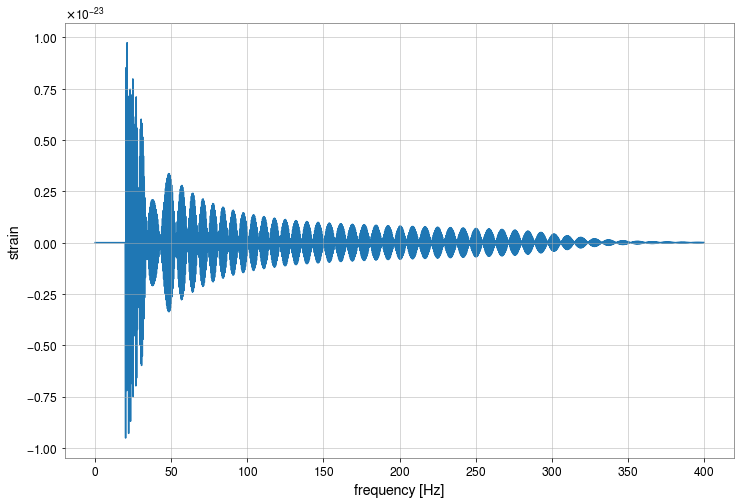

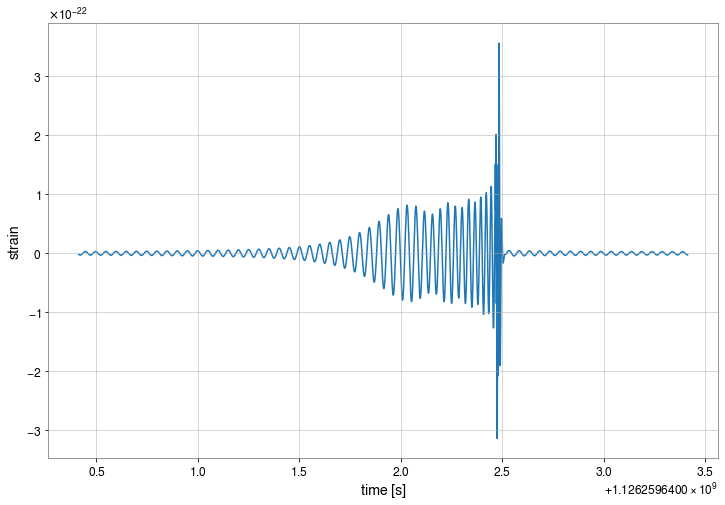

In [14]:
#For more control over plotting

#Zero the data again
ifos.set_strain_data_from_zero_noise(
    sampling_frequency=sampling_frequency,
    duration=duration,
    start_time=injection_parameters["geocent_time"] - 2,
)

#inject chosen signal to the interferometer
ifos.inject_signal(
    waveform_generator=waveform_generator, parameters=injection_parameters
)

#raw data for plotting
frequency_domain_strain = ifos[0].strain_data.frequency_domain_strain
time_domain_strain = ifos[0].strain_data.time_domain_strain
frequency_array=ifos[0].frequency_array
time_array=ifos[0].time_array

#Plot in frequency domain

# choose frequency range to plot
freq_min = 0
freq_max = 400
freq_mask = (frequency_array>=freq_min)*(frequency_array<=freq_max)
plt.figure(figsize=[12,8])
plt.xlabel('frequency [Hz]')
plt.ylabel('strain')
plt.plot(frequency_array[freq_mask], frequency_domain_strain[freq_mask])
plt.show()

#Plot in time domain

# here for convinience time_min/time_max is measured from the start of the data segment
time_min = 0
time_max = duration-1
time_mask = ((time_array-time_array[0])>=freq_min)*((time_array-time_array[0])<=time_max)
plt.figure(figsize=[12,8])
plt.xlabel('time [s]')
plt.ylabel('strain')
plt.plot(time_array[time_mask], time_domain_strain[time_mask])
plt.show()

## Plotting of polarizations

/home/tomek/anaconda3/envs/bilby/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/tomek/anaconda3/envs/bilby/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


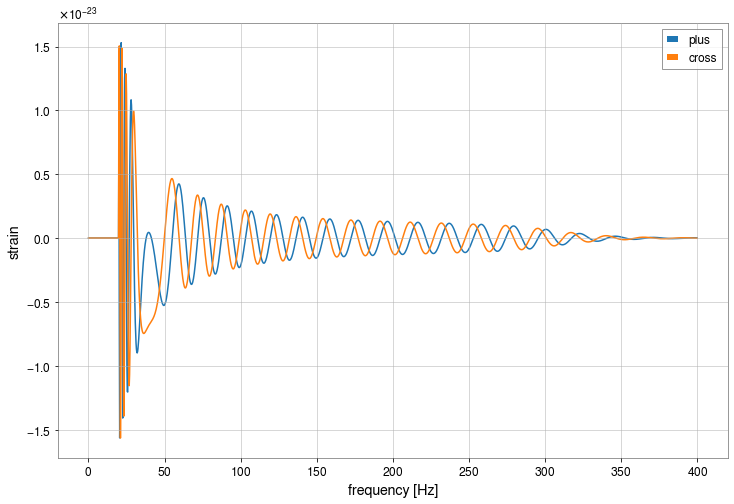

In [59]:
# inspecting polarizations directly (these are not projected to the detectors and not timeshifted)

#Zero the data again
ifos.set_strain_data_from_zero_noise(
    sampling_frequency=sampling_frequency,
    duration=duration,
    start_time=injection_parameters["geocent_time"] - 2,
)

frequency_array=ifos[0].frequency_array

#get polarizations
polarizations = bilbyLIV.waveform.liv_binary_black_hole(frequency_array, **injection_parameters, **waveform_arguments)

#Plot in frequency domain

# choose frequency range to plot
freq_min = 0
freq_max = 400
freq_mask = (frequency_array>=freq_min)*(frequency_array<=freq_max)
plt.figure(figsize=[12,8])
plt.xlabel('frequency [Hz]')
plt.ylabel('strain')
plt.plot(frequency_array[freq_mask], polarizations['plus'][freq_mask], label='plus')
plt.plot(frequency_array[freq_mask], polarizations['cross'][freq_mask], label='cross')
plt.legend()
plt.show()


## Compare bilby and LAL implementations

There is small difference in phase, likely due numerical precision

/home/tomek/anaconda3/envs/bilby/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/tomek/anaconda3/envs/bilby/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


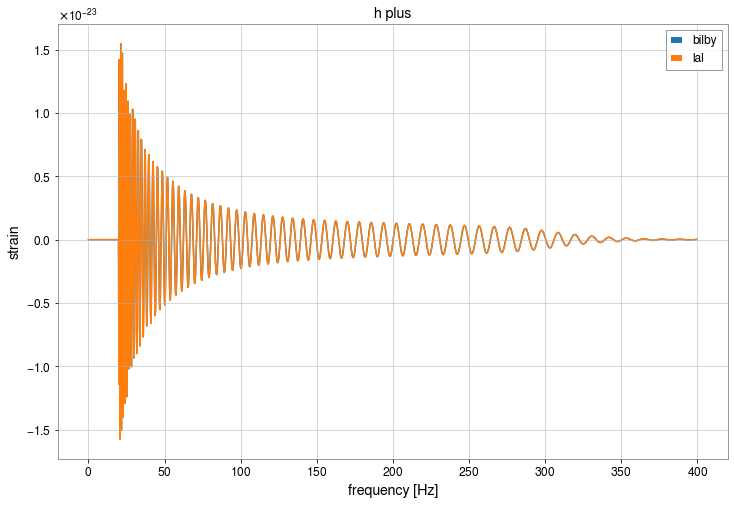

/home/tomek/anaconda3/envs/bilby/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


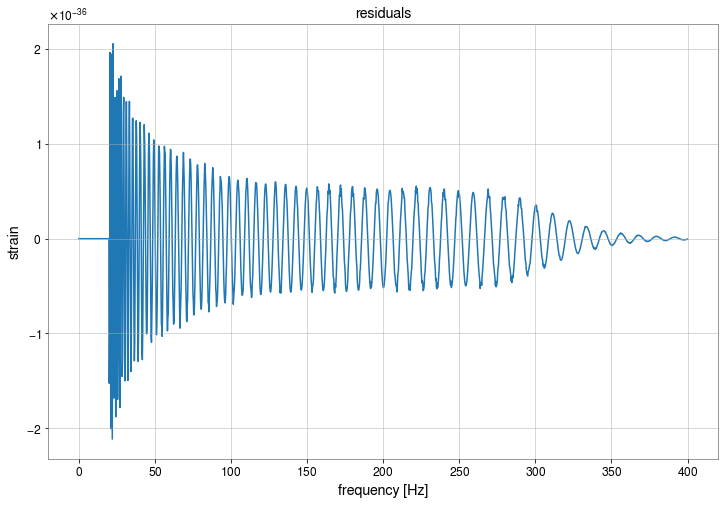

/tmp/ipykernel_4854/346219170.py:72: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(frequency_array[freq_mask], np.angle(polarizations['plus'][freq_mask]/lal_polarizations['plus'][freq_mask]))


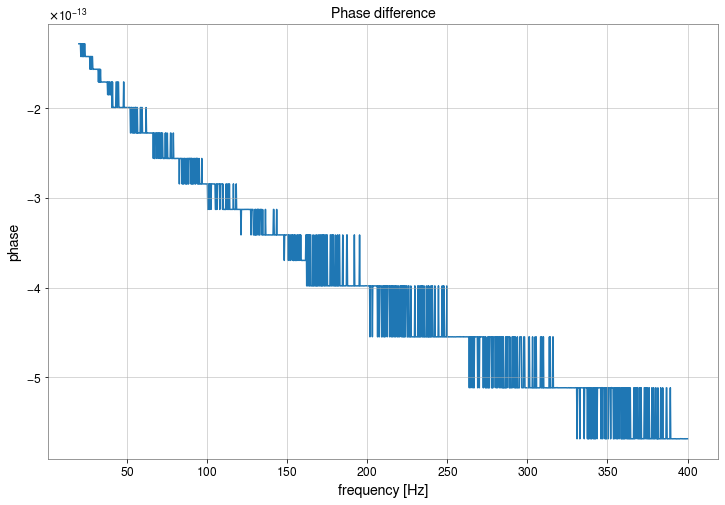

In [64]:
#compare lal waveform and bilby waveform

#code to directly call LAL waveform
import lal
import lalsimulation
def BBH_log_lambda_eff(frequency_array, mass_1, mass_2, luminosity_distance, a_1, tilt_1,
            phi_12, a_2, tilt_2, phi_jl, theta_jn, phase, alpha, log_lambda_eff, sign_A, **kwargs):
    
    LALparams = kwargs.get('lal_waveform_dictionary', lal.CreateDict())
    
    lalsimulation.SimInspiralWaveformParamsInsertEnableLIV(LALparams, 1)
    lalsimulation.SimInspiralWaveformParamsInsertNonGRLIVLogLambdaEff(LALparams, log_lambda_eff)
    lalsimulation.SimInspiralWaveformParamsInsertNonGRLIVASign(LALparams, sign_A)
    lalsimulation.SimInspiralWaveformParamsInsertNonGRLIVAlpha(LALparams, alpha)
    
    kwargs['lal_waveform_dictionary']=LALparams
    
    
    return bilby.gw.source.lal_binary_black_hole(
        frequency_array, mass_1, mass_2, luminosity_distance, a_1, tilt_1,
        phi_12, a_2, tilt_2, phi_jl, theta_jn, phase, **kwargs)


#from bilby injection create corresponding LAL injection
lal_injection_parameters=injection_parameters.copy()

lal_injection_parameters['sign_A']=np.sign(lal_injection_parameters['A_eff'])
lal_injection_parameters['log_lambda_eff']=np.log10(bilbyLIV.conversion.A_to_lambda(
    lal_injection_parameters.pop('A_eff'), lal_injection_parameters['alpha']))

#polarizations from bilby
frequency_array=ifos[0].frequency_array
# to compare with lal, use phase velocity parametrization instead of default group velocity one
polarizations = bilbyLIV.waveform.liv_binary_black_hole_phase(frequency_array, **injection_parameters, **waveform_arguments)

#polarizations from lal
lal_polarizations = BBH_log_lambda_eff(frequency_array, **lal_injection_parameters, **waveform_arguments)


#Plot in frequency domain

# choose frequency range to plot
freq_min = 0
freq_max = 400
freq_mask = (frequency_array>=freq_min)*(frequency_array<=freq_max)
plt.figure(figsize=[12,8])
plt.xlabel('frequency [Hz]')
plt.ylabel('strain')
plt.title('h plus')
plt.plot(frequency_array[freq_mask], (polarizations['plus'][freq_mask]), label='bilby')
plt.plot(frequency_array[freq_mask], (lal_polarizations['plus'][freq_mask]), label='lal')
plt.legend()
plt.show()

freq_min = 0
freq_max = 400
freq_mask = (frequency_array>=freq_min)*(frequency_array<=freq_max)
plt.figure(figsize=[12,8])
plt.xlabel('frequency [Hz]')
plt.ylabel('strain')
plt.title('residuals')
plt.plot(frequency_array[freq_mask], (polarizations['plus'][freq_mask]-lal_polarizations['plus'][freq_mask]))
plt.show()

freq_min = 0
freq_max = 400
freq_mask = (frequency_array>=freq_min)*(frequency_array<=freq_max)
plt.figure(figsize=[12,8])
plt.xlabel('frequency [Hz]')
plt.ylabel('phase')
plt.title('Phase difference')
plt.plot(frequency_array[freq_mask], np.angle(polarizations['plus'][freq_mask]/lal_polarizations['plus'][freq_mask]))
plt.show()

## Compare LIV waveform with GR one

/home/tomek/anaconda3/envs/bilby/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/tomek/anaconda3/envs/bilby/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


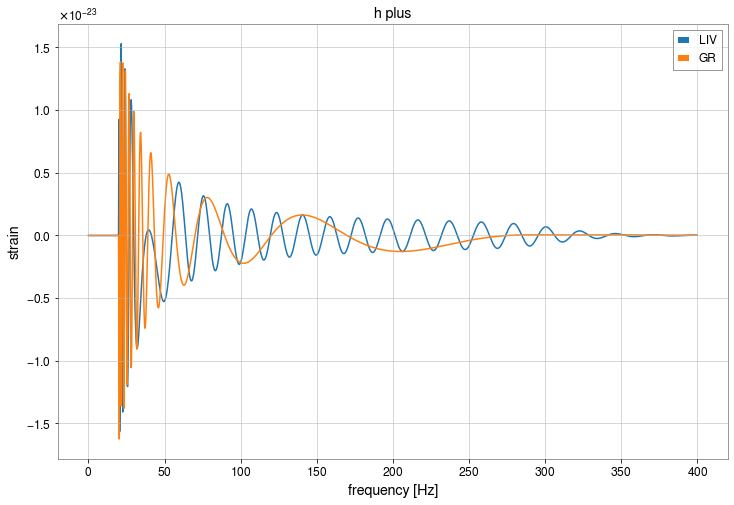

/home/tomek/anaconda3/envs/bilby/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


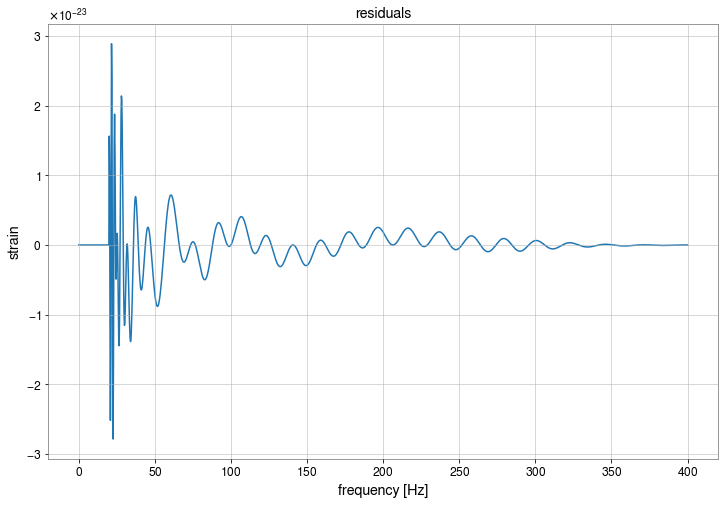

In [56]:
#compare GR and non GR polarizations



#create gr injection
gr_injection_parameters=injection_parameters.copy()

gr_injection_parameters['A_eff']=0

#polarizations from liv
frequency_array=ifos[0].frequency_array

polarizations = bilbyLIV.waveform.liv_binary_black_hole(frequency_array, **injection_parameters, **waveform_arguments)

#polarizations from gr
gr_polarizations = bilby.gw.source.lal_binary_black_hole(frequency_array, **gr_injection_parameters, **waveform_arguments)


#Plot in frequency domain

# choose frequency range to plot
freq_min = 0
freq_max = 400
freq_mask = (frequency_array>=freq_min)*(frequency_array<=freq_max)
plt.figure(figsize=[12,8])
plt.xlabel('frequency [Hz]')
plt.ylabel('strain')
plt.title('h plus')
plt.plot(frequency_array[freq_mask], (polarizations['plus'][freq_mask]), label='LIV')
plt.plot(frequency_array[freq_mask], (gr_polarizations['plus'][freq_mask]), label='GR')
plt.legend()
plt.show()

freq_min = 0
freq_max = 400
freq_mask = (frequency_array>=freq_min)*(frequency_array<=freq_max)
plt.figure(figsize=[12,8])
plt.xlabel('frequency [Hz]')
plt.ylabel('strain')
plt.title('residuals')
plt.plot(frequency_array[freq_mask], (polarizations['plus'][freq_mask]-gr_polarizations['plus'][freq_mask]))
plt.show()